In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cup2022matches = pd.read_csv("data/Fifa_world_cup_matches.csv")
cup1930to2018matches = pd.read_csv("data/wcmatches.csv")
cups1930to2018 = pd.read_csv("data/worldcups.csv")
continents = pd.read_csv("data/continents.csv")

In [3]:
cup2022matches.rename(columns = {'team1': 'home_team', 'team2': 'away_team'}, inplace = True)
cup2022matches["year"] = 2022
cup2022matches["home_team"] = cup2022matches["home_team"].str.title()
cup2022matches["away_team"] = cup2022matches["away_team"].str.title()
all_games = pd.concat([cup1930to2018matches, cup2022matches])
countries_and_year = all_games[["year", "home_team", "away_team"]]
countries_and_year
melted_df = pd.melt(countries_and_year, id_vars = "year", var_name = 'Team', value_name = 'Country')
countries_by_year = melted_df[["year", "Country"]]
unique_countries_by_year = countries_by_year.groupby('year')['Country'].unique().reset_index().explode('Country')
unique_countries_by_year
countries_with_continent = pd.merge(unique_countries_by_year, continents, on = 'Country', how = 'left')
outside_europe_or_sa = countries_with_continent[(countries_with_continent["Continent"] != "Europe") & (countries_with_continent["Continent"] != "South America")]

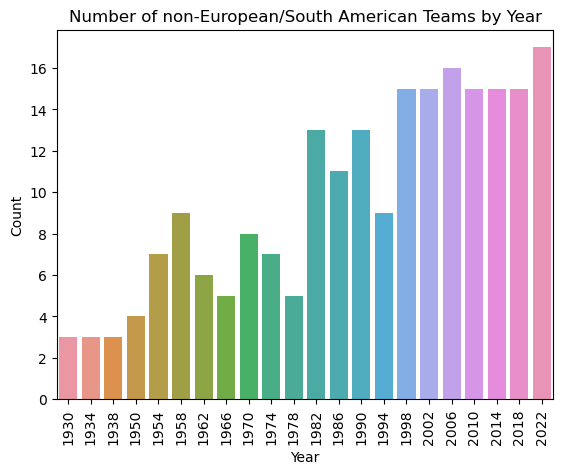

In [4]:
sns.countplot(x = 'year', data = outside_europe_or_sa)
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of non-European/South American Teams by Year')
plt.show()